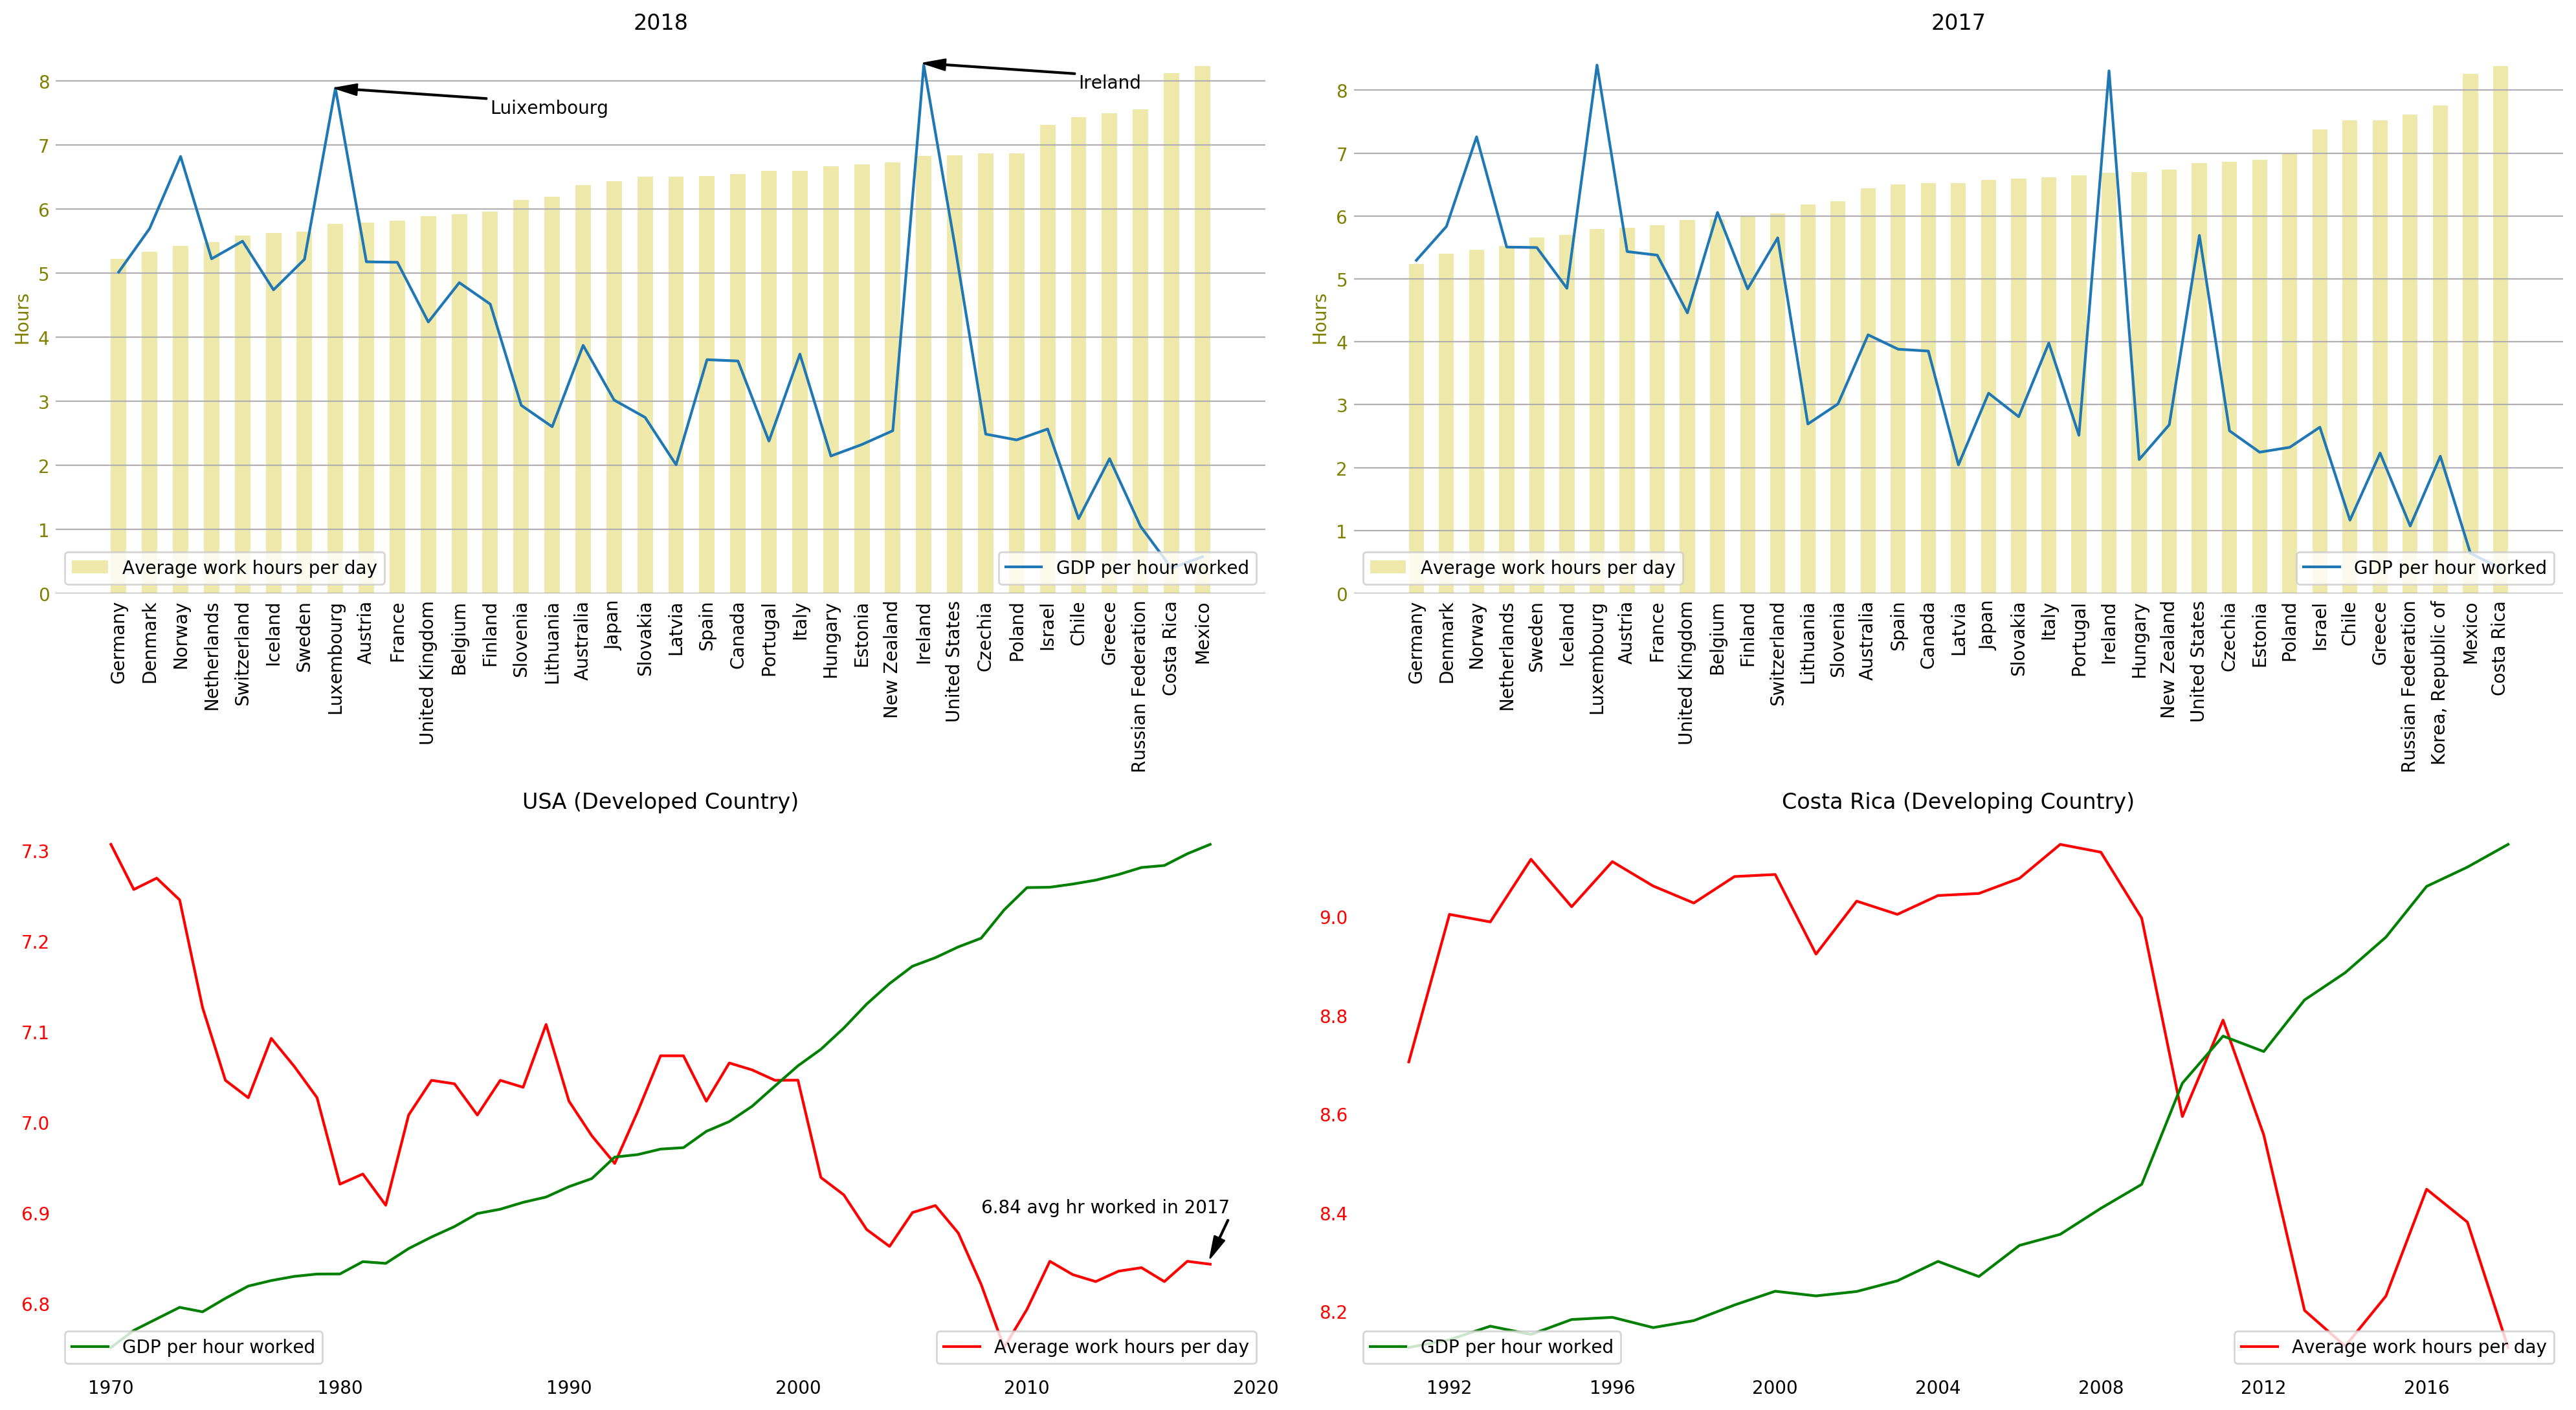

In [61]:
import pandas as pd
import numpy as np
import workdays
import datetime as dt
import workdays as wd
import pycountry
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from dateutil.parser import parse

# ==========
# Data Input
# ==========
# https://data.oecd.org/lprdty/gdp-per-hour-worked.htm
df_workhour = pd.read_csv('/Users/Charles/Downloads/DP_LIVE_08012020085450718.csv')

# https://data.oecd.org/lprdty/gdp-per-hour-worked.htm
df_gdp = pd.read_csv('/Users/Charles/Downloads/DP_LIVE_08012020093249240.csv')

df = pd.merge(df_workhour, df_gdp[df_gdp['MEASURE'] == 'USD'], on=['LOCATION', 'TIME'], how='inner')

# ==========
# Change work hour per year to work hour per day
# ==========
def cleanupdate(year, df):
    start_date = dt.datetime(int(year),1,1)
    end_date = dt.datetime(int(year),12,31)
    workdays = wd.networkdays(start_date, end_date)
    df.loc[df['TIME'] == year, 'Value_x'] = df.loc[df['TIME'] == year, 'Value_x'] / workdays

# ==========
# Clean up location data
# ==========
df['LOCATION'] = df['LOCATION'].apply(lambda x: pycountry.countries.get(alpha_3=x).name if len(x) == 3 else (pycountry.countries.get(alpha_2=x).name if len(x) == 2 else np.nan))


# ==========
# Plotting part
# ==========
fig = plt.figure(figsize=(20, 11), dpi=200)

# ===== first subplot =====
ax1 = fig.add_subplot(2, 2, 1)
plot_df1 = df.loc[df['TIME'] == 2018,:].sort_values(by='Value_x', axis=0, ascending=True)
cleanupdate(2018, plot_df1)
ax1.bar(plot_df1['LOCATION'], plot_df1['Value_x'], color='palegoldenrod', width=0.5, label='Average work hours per day')
ax1.tick_params(labelrotation=90, bottom=0, top=0, left=0, right=0, length=0)
ax1.tick_params(axis='y', labelcolor='olive', labelrotation=0)
ax1.set_title('2018')
ax1.legend(loc='lower left')
ax1.grid(axis='y')
ax1.set_ylabel('Hours', color='olive')
'''
unused code
ax.grid()
ax.set_xticks(np.arange(1968,2011,step=10))
ax.set_yticks(np.arange(0,100,step=20))
ax.set_xlim(1968,2011)
ax.set_ylim(0,100)
ax.set_xlabel('Country')
'''

ax2 = ax1.twinx()
ax2.plot(plot_df1['LOCATION'], plot_df1['Value_y'], label='GDP per hour worked')
ax2.tick_params(labelrotation=90, bottom=0, top=0, left=0, right=0, length=0)
ax2.legend(loc='lower right')
ax2.annotate("Luixembourg", xy=('Luxembourg', 96), xytext=('Finland', 92), arrowprops=dict(facecolor='black', width=0.5, headwidth=6))
ax2.annotate("Ireland", xy=('Ireland', 100), xytext=('Chile', 96), arrowprops=dict(facecolor='black', width=0.5, headwidth=6))

# ===== second subplot =====
ax3 = fig.add_subplot(2, 2, 2)
plot_df3 = df.loc[df['TIME'] == 2017,:].sort_values(by='Value_x', axis=0, ascending=True)
cleanupdate(2017, plot_df3)
plot_df3.dropna(subset=['LOCATION'], how='all', inplace=True)
ax3.bar(plot_df3.LOCATION, plot_df3.Value_x, color='palegoldenrod', width=0.5, label='Average work hours per day')
ax3.tick_params(labelrotation=90, bottom=0, top=0, left=0, right=0, length=0)
ax3.tick_params(axis='y', labelcolor='olive', labelrotation=0)
ax3.set_title('2017')
ax3.legend(loc='lower left')
ax3.grid(axis='y')
ax3.set_ylabel('Hours', color='olive')

ax4 = ax3.twinx()
ax4.plot(plot_df3['LOCATION'], plot_df3['Value_y'], label='GDP per hour worked')
ax4.tick_params(bottom=0, top=0, left=0, right=0, length=0)
ax4.legend(loc='lower right')

# ===== third subplot =====
ax5 = fig.add_subplot(2, 2, 3)
plot_df5 = df.loc[df['LOCATION'] == 'United States',:].sort_values(by='Value_x', axis=0, ascending=True)
plot_df5['TIME'] = plot_df5['TIME'].apply(lambda x: dt.datetime.strptime(str(x), '%Y'))
plot_df5.set_index(plot_df5['TIME'], inplace=True, drop=True)
plot_df5 = plot_df5.sort_index(ascending=True)
for i in range(1970, 2019, 1):
    cleanupdate(str(i), plot_df5)
ax5.plot(plot_df5.Value_x, color='red', label='Average work hours per day')
ax5.tick_params(bottom=0, top=0, left=0, right=0, length=0)
ax5.tick_params(axis='y', labelcolor='red')
ax5.set_title('USA (Developed Country)')
ax5.legend(loc='lower right')
ax5.annotate('6.84 avg hr worked in 2017', xy=(dt.datetime(2018,1,1), 6.85), xytext=(dt.datetime(2008,1,1), 6.9), arrowprops=dict(facecolor='black', width=0.5, headwidth=6)) # print(plot_df5[plot_df5.TIME == dt.datetime(2018,1,1)].Value_x)

ax6 = ax5.twinx()
ax6.plot(plot_df5.Value_y, color='green', label='GDP per hour worked')
ax6.tick_params(bottom=0, top=0, left=0, right=0, length=0)
ax6.legend(loc='lower left')

# ===== Last subplot =====
ax7 = fig.add_subplot(2, 2, 4)
plot_df7 = df.loc[df['LOCATION'] == 'Costa Rica',:].sort_values(by='Value_x', axis=0, ascending=True)
plot_df7['TIME'] = plot_df7['TIME'].apply(lambda x: dt.datetime.strptime(str(x), '%Y'))
plot_df7.set_index(plot_df7['TIME'], inplace=True, drop=True)
plot_df7 = plot_df7.sort_index(ascending=True)
for i in range(1970, 2019, 1):
    cleanupdate(str(i), plot_df7)
ax7.plot(plot_df7.Value_x, color='red', label='Average work hours per day')
ax7.tick_params(bottom=0, top=0, left=0, right=0, length=0)
ax7.tick_params(axis='y', labelcolor='red')
ax7.set_title('Costa Rica (Developing Country)')
ax7.legend(loc='lower right')

ax8 = ax7.twinx()
ax8.plot(plot_df7.Value_y, color='green', label='GDP per hour worked')
ax8.tick_params(bottom=0, top=0, left=0, right=0, length=0)
ax8.legend(loc='lower left')

# ==========
# plot ascetics
# ==========
for key,spine in ax1.spines.items():
    spine.set_visible(False)
for key,spine in ax2.spines.items():
    spine.set_visible(False)
for key,spine in ax3.spines.items():
    spine.set_visible(False)
for key,spine in ax4.spines.items():
    spine.set_visible(False)
for key,spine in ax5.spines.items():
    spine.set_visible(False)
for key,spine in ax6.spines.items():
    spine.set_visible(False)
for key,spine in ax7.spines.items():
    spine.set_visible(False)
for key,spine in ax8.spines.items():
    spine.set_visible(False)

# disable ticklabels on the right side of y axis
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax8.get_yticklabels(), visible=False)

# otherwise the right y-label will be clipped    
fig.tight_layout()

# show the plt object
plt.show()

In [60]:
fig.savefig('/Users/Charles/Downloads/Hours_worked_by_country.pdf', dpi=400, bbox_inches='tight')
fig.savefig('/Users/Charles/Downloads/Hours_worked_by_country.png', dpi=400, bbox_inches='tight')